# First, downloading the data

In [1]:
#Importing the librairies

import os
import tarfile
import urllib

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

#Only for jupyter notebooks
%matplotlib inline

In [2]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets","housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

In [3]:
#Function to download the data
def fetch_housing_data(housing_url = HOUSING_URL,housing_path=HOUSING_PATH):
    os.makedirs(housing_path,exist_ok=True)
    tgz_path = os.path.join(housing_path,"housing.tgz")
    urllib.request.urlretrieve(housing_url,tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [4]:
#Function to load the data
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path,"housing.csv")
    return pd.read_csv(csv_path)

In [5]:
#Getting the data
fetch_housing_data()

In [6]:
#Loading the data
housing = load_housing_data()

In [7]:
housing.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

In [8]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [9]:
#Getting the number of different values for ocean proximity and the relative %.
print(f"{housing['ocean_proximity'].value_counts()}")
print(f"{housing['ocean_proximity'].value_counts() / len(housing) * 100}")

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64
<1H OCEAN     44.263566
INLAND        31.739341
NEAR OCEAN    12.877907
NEAR BAY      11.094961
ISLAND         0.024225
Name: ocean_proximity, dtype: float64


In [10]:
#Summary of each numerical attribue
housing.describe().transpose()

count           mean            std         min  \
longitude           20640.0    -119.569704       2.003532   -124.3500   
latitude            20640.0      35.631861       2.135952     32.5400   
housing_median_age  20640.0      28.639486      12.585558      1.0000   
total_rooms         20640.0    2635.763081    2181.615252      2.0000   
total_bedrooms      20433.0     537.870553     421.385070      1.0000   
population          20640.0    1425.476744    1132.462122      3.0000   
households          20640.0     499.539680     382.329753      1.0000   
median_income       20640.0       3.870671       1.899822      0.4999   
median_house_value  20640.0  206855.816909  115395.615874  14999.0000   

                            25%          50%           75%          max  
longitude             -121.8000    -118.4900    -118.01000    -114.3100  
latitude                33.9300      34.2600      37.71000      41.9500  
housing_median_age      18.0000      29.0000      37.00000      52.0000  
total_rooms           1447.7500    2127.0000    3148.00000   39320.0000  
total_bedrooms         296.0000     435.0000     647.00000    6445.0000  
population             787.0000    1166.0000    1725.00000   35682.0000  
households             280.0000     409.0000     605.00000    6082.0000  
median_income            2.5634       3.5348       4.74325      15.0001  
median_house_value  119600.0000  179700.0000  264725.00000  500001.0000

In [11]:
sns.pairplot(housing)
#housing.hist() for the matplotlib version.

/home/alex/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/alex/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Few observations:
* Median Income is not in US Dollars but represents a scale (from 0.5 to 15).
* Housing Median age and Median House Value are capped. Since Median House Value is our target attribute, she should be careful about how we sold the problem, wether we collect uncapped data or we remove the data with the capped value (to not introduce poor prediction for this value).|

In [12]:
#Splitting the data into train/test set
from sklearn.model_selection import train_test_split
train_set,test_set = train_test_split(housing,test_size=0.2,random_state=42)

But because we want to keep our ratio for the housing median value,we'll use stratified sampling (based on bins of the housing median value to create categorical attributes from the continuous numerical attributes) instead of a purely random sampling.

#N.B. It is important to have a sufficient number of instances in a dataset for each stratum (homogeneous subgroups) or else the estimate of a stratum's importance may be biased. This means we should not have too many strata and each stratum should be large enough.

In [13]:
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0,1.5,3.0,4.5,6,np.inf],
                               labels=[1,2,3,4,5])

#We choose median income as we know from experts that is a very important attribute.

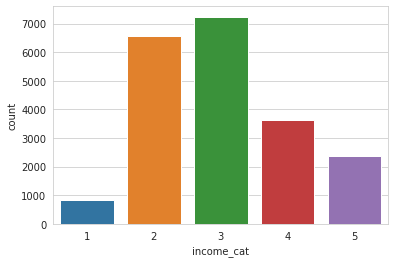

In [14]:
sns.countplot("income_cat",data=housing)
#housing["income_cat"].hist() for the matplotlib version

In [15]:
from sklearn.model_selection import StratifiedShuffleSplit

In [16]:
split = StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index,test_index in split.split(housing,housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [17]:
#Let's see if we have kept the proportion...
print(f"Stratified Test set income cat proportion")
print(f'{strat_test_set["income_cat"].value_counts() / len(strat_test_set) * 100}')
print("\n")
print(f"Dataset income cat proportion")
print(f'{housing["income_cat"].value_counts() / len(housing) * 100}')

Stratified Test set income cat proportion
3    35.053295
2    31.879845
4    17.635659
5    11.458333
1     3.972868
Name: income_cat, dtype: float64


Dataset income cat proportion
3    35.058140
2    31.884690
4    17.630814
5    11.443798
1     3.982558
Name: income_cat, dtype: float64


In [18]:
#Now we delete the income category to get back our original data.
for set_ in (strat_train_set,strat_test_set):
    set_.drop("income_cat",axis=1,inplace=True)

In [19]:
#Creating a copy to explore the train set. In our case, because the train set is not too big, we don't need to create an exploratory sample.
housing = strat_train_set.copy()

[]

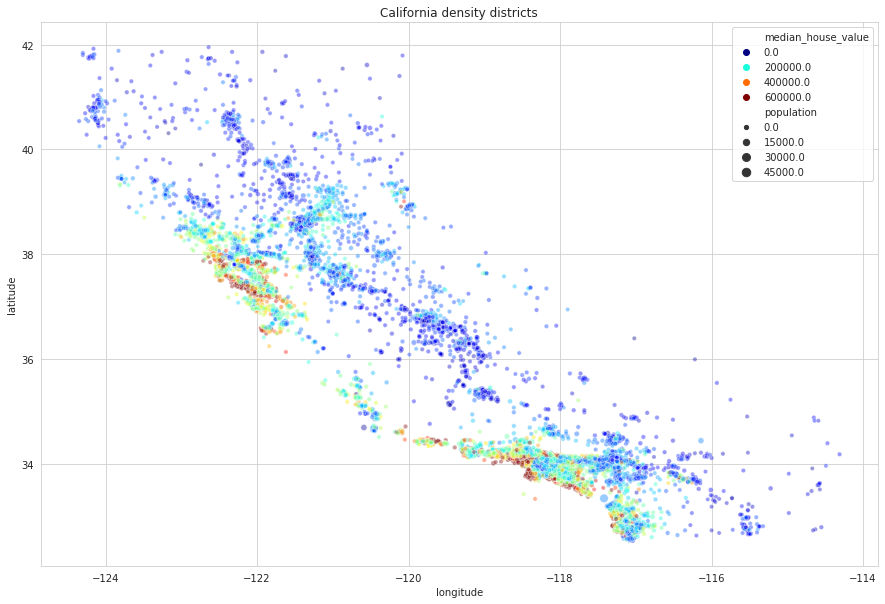

In [20]:
#Since we are working with geographical data, it's a good idea to plot them in a scatter plot to get the density of each districts.

plt.figure(figsize=(15,10))
sns.scatterplot(data=housing,x="longitude",y="latitude",alpha=.4,size="population",hue="median_house_value",palette="jet")
plt.title("California density districts")
plt.plot()

We can see that the prices are correlated to the location and concentrated in certain areas.

Now we take a look at the correlation...

In [21]:
corr_matrix = housing.corr()

In [22]:
plt.figure(figsize=(12,12))
sns.heatmap(corr_matrix.sort_values(by="median_house_value",ascending=False))
plt.plot()

[]

In [23]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

The correlation coefficient ranges from -1 to 1. When it's close to 1, there's a strong positive correlation, as opposite to close to -1 where there's a strong negative correlation.

/_ ! _\ : Correlation coefficient only measures linear correlations, and misses out all of the nonlinear correlation.|

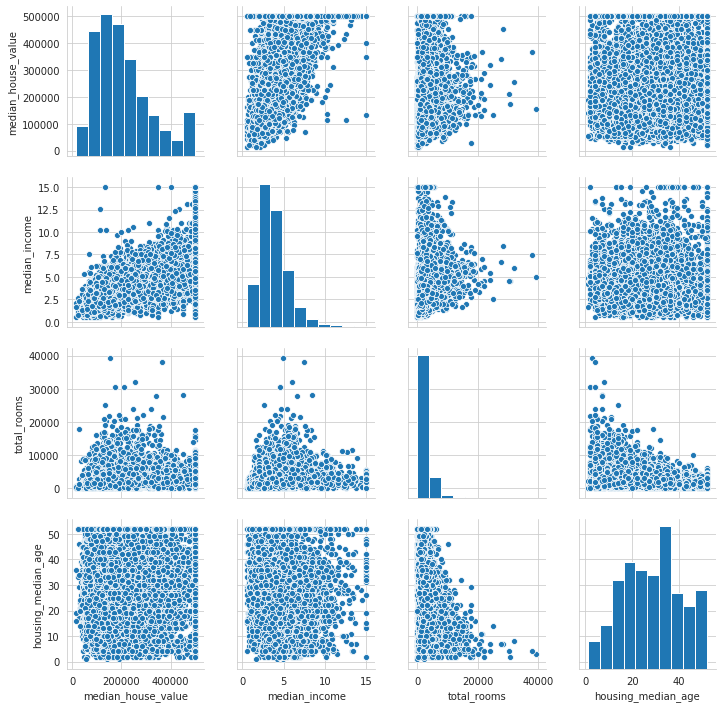

In [24]:
#We are going to plot only the most promising attributes related to median housing values...
attributes = ["median_house_value","median_income","total_rooms","housing_median_age"]
sns.pairplot(housing[attributes])

In [25]:
#Let's zoom to the median income

sns.scatterplot(data=housing,x="median_income",y="median_house_value")

We can see that the correlation between the two is very strong by the presence of the upward trend. However, we can also notice the price cap which is around 500k , with a straight but also some straight lines around 450k,350k and 280k. Maybe we should remove those data to not bias the algorithm.

In [26]:
#Feature engineering... Creating new features...
housing["rooms_per_household"] = housing["total_rooms"] / housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["population_per_household"] = housing["population"] / housing["households"]

In [27]:
#Matrix Correlation...
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

We can see a stronger negative relation for the bedrooms per room (the more bedrooms, the higher the price) than the rooms_per_household or population_per_household.

In [28]:
sns.scatterplot(data=housing,x="bedrooms_per_room",y="median_house_value")

In [29]:
#Preparing fata for the first machine learning algorithm

housing = strat_train_set.drop("median_house_value",axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

# Data Cleaning 

**Few options:**
* Get rid of the corresponding districts.
* Get rid of the whole attribute.
* Set the values to some value (zero, the mean, the median, etc.)

**Options with pandas:**
* housing.dropna(subset=["total_bedrooms"]) #Option 1
* housing.drop("total_bedrooms",axis=1) #Option 2
* housing["total_bedrooms"].fillna(housing["total_bedrooms"].median(),inplace=True) #Option 3

If we go with the option 3, we will have to save the median value to remplace it in the test set.

In [30]:
from sklearn.impute import SimpleImputer

In [31]:
imputer = SimpleImputer(strategy="median")

In [32]:
housing_num = housing.drop("ocean_proximity",axis=1) #To compute the median in the numerical attributes.

In [33]:
imputer.fit(housing_num)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [34]:
print(f"{imputer.statistics_}")
print(f"{housing_num.median().values}")

[-118.51     34.26     29.     2119.5     433.     1164.      408.
    3.5409]
[-118.51     34.26     29.     2119.5     433.     1164.      408.
    3.5409]


In [35]:
X = imputer.transform(housing_num)
housing_tr = pd.DataFrame(X,columns=housing_num.columns,index=housing_num.index)

In [36]:
housing_tr.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
17606    -121.89     37.29                38.0       1568.0           351.0   
18632    -121.93     37.05                14.0        679.0           108.0   
14650    -117.20     32.77                31.0       1952.0           471.0   
3230     -119.61     36.31                25.0       1847.0           371.0   
3555     -118.59     34.23                17.0       6592.0          1525.0   

       population  households  median_income  
17606       710.0       339.0         2.7042  
18632       306.0       113.0         6.4214  
14650       936.0       462.0         2.8621  
3230       1460.0       353.0         1.8839  
3555       4459.0      1463.0         3.0347

In [37]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(10)

ocean_proximity
17606       <1H OCEAN
18632       <1H OCEAN
14650      NEAR OCEAN
3230           INLAND
3555        <1H OCEAN
19480          INLAND
8879        <1H OCEAN
13685          INLAND
4937        <1H OCEAN
4861        <1H OCEAN

In [38]:
#Because we have to encode in numbers those text values... We are gonna use a OrdinalEncoder since it's a categorical value.
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[0.],
       [0.],
       [4.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.]])

In [39]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [40]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

In [41]:
cat_encoder = OneHotEncoder()

In [42]:
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)

In [43]:
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [44]:
#Can convert the SciPy Sparse matrix to array
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [45]:
#And see the list of the categories.
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [46]:
from sklearn.base import BaseEstimator, TransformerMixin

In [47]:
rooms_ix,bedrooms_ix,population_ix, households_ix = 3,4,5,6

In [48]:
class CombinedAttributesAdder(BaseEstimator,TransformerMixin):
    def __init__(self,add_bedrooms_per_room = True): #No *args or **kwargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self,X,y=None):
        return self
    def transform(self,X,y=None):
        rooms_per_household = X[:,rooms_ix] / X[:,households_ix]
        population_per_houshold = X[:,population_ix] / X[:,households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:,bedrooms_ix] / X[:,rooms_ix]
            return np.c_[X,rooms_per_household,population_per_houshold,bedrooms_per_room]
        else:
            return np.c_[X,rooms_per_household,population_per_houshold]

In [49]:
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [50]:
#Creating a OneHotEncoder for getting the dummy... it works better than way due to the lack of ordination in the category.

num_pipeline = Pipeline([
                        ("imputer",SimpleImputer(strategy="median")),
                        ("attribs_adder",CombinedAttributesAdder()),
                        ("std_scaler",StandardScaler())
                        ])

#For the pipeline, all the but the last estimator must be transformers.

In [51]:
housing_num_tr = num_pipeline.fit_transform(housing_num) #This is just for the numerical attributes.

In [52]:
from sklearn.compose import ColumnTransformer

In [53]:
num_attribs = list(housing_num)

cat_attribs = ["ocean_proximity"]

In [54]:
full_pipeline = ColumnTransformer([
                ("num",num_pipeline,num_attribs),
                ("cat",OneHotEncoder(),cat_attribs),    
                ])

In [55]:
housing_prepared = full_pipeline.fit_transform(housing)

In [56]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity'],
      dtype='object')

In [57]:
from sklearn.linear_model import LinearRegression

In [58]:
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared,housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [59]:
#Let's try on other instances from the training set...
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print(f"Prediction : {lin_reg.predict(some_data_prepared)}")
print(f"Labels: {list(some_labels)}")

Prediction : [210644.60459286 317768.80697211 210956.43331178  59218.98886849
 189747.55849879]
Labels: [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


In [60]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels,housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68628.19819848923

In [61]:
#Having a typical prediction error of 68 628$ is not great when the range of most district is between 120k$ and 265k$ (between 25% and 75%).

**CONCLUSION: UNDERFITTING**

In [62]:
from sklearn.tree import DecisionTreeRegressor

In [63]:
tree_reg = DecisionTreeRegressor()

In [64]:
tree_reg.fit(housing_prepared,housing_labels)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [65]:
housing_prediction = tree_reg.predict(housing_prepared)

In [66]:
tree_mse = mean_squared_error(housing_labels,housing_prediction)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

**Since we believe there's overfitting, we should try on the validation set --> Cross-Validation**

In [67]:
from sklearn.model_selection import cross_val_score

In [68]:
scores = cross_val_score(tree_reg,housing_prepared,housing_labels,scoring="neg_mean_squared_error",cv=10)

In [69]:
tree_rmse_scores = np.sqrt(-scores)

In [70]:
def display(scores):
    print(f"Scores: {scores}")
    print(f"Mean: {scores.mean()}")
    print(f"Standard deviation: {scores.std()}")

In [71]:
display(tree_rmse_scores)

Scores: [69509.79940087 66908.27832123 69663.77245749 68678.20787018
 70415.65120159 73767.00456006 70272.12568906 70632.91062269
 75450.20863351 68839.9527854 ]
Mean: 70413.7911542088
Standard deviation: 2362.9471636263397


**Worst than the Linear Regression** ! (N.B: Scikit-Learn's cross-validation features except a utility functions (greater is better) than a cost function (lower is better) thus why the - scores)

In [72]:
lin_scores = cross_val_score(lin_reg,housing_prepared,housing_labels,scoring="neg_mean_squared_error",cv=10)

In [73]:
lin_rmse_score = np.sqrt(-lin_scores)
display(lin_rmse_score)

Scores: [66782.73843989 66960.118071   70347.95244419 74739.57052552
 68031.13388938 71193.84183426 64969.63056405 68281.61137997
 71552.91566558 67665.10082067]
Mean: 69052.46136345083
Standard deviation: 2731.6740017983425


In [74]:
#Let's try a RF...
from sklearn.ensemble import RandomForestRegressor

In [75]:
rf_reg = RandomForestRegressor()

In [76]:
rf_reg.fit(housing_prepared,housing_labels)

/home/alex/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [77]:
housing_prediction = rf_reg.predict(housing_prepared)

In [78]:
forest_mse = mean_squared_error(housing_labels,housing_prediction)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

22439.641798416687

In [79]:
rf_scores = cross_val_score(rf_reg,housing_prepared,housing_labels,scoring="neg_mean_squared_error",cv=10)

In [80]:
rf_rmse_scores = np.sqrt(-rf_scores)
display(rf_rmse_scores)

Scores: [52076.2171523  50782.73146831 52664.98622495 54573.76689384
 51944.09816346 56388.25782744 50772.94087065 51150.25717035
 54794.30271878 52374.28495859]
Mean: 52752.18434486705
Standard deviation: 1798.1131005130408


**But because the error on the training set is still much lower than the validation set, we must overfit again. We should try to get more data, or normalize,  or to simplify the model with the risk of underfitting.**

## Grid Search 

In [81]:
from sklearn.model_selection import GridSearchCV

In [82]:
param_grid =[
            {"n_estimators":[3,10,30],"max_features":[2,4,6,8]},
            {"bootstrap":[False],"n_estimators":[3,10],"max_features":[2,3,4]},
            ]

In [83]:
rf_reg = RandomForestRegressor(n_jobs=-1)

In [84]:
grid_search = GridSearchCV(rf_reg,param_grid,cv=5,scoring="neg_mean_squared_error",return_train_score=True)

In [85]:
grid_search.fit(housing_prepared,housing_labels) #if no idea of hyperpameters, trying consecutive powers of 10.

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=-1,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'max_features': [2, 4, 6, 8],
  

In [86]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [87]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=6, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=-1,
                      oob_score=False, random_state=None, verbose=0,
                      warm_start=False)

In [88]:
cvres = grid_search.cv_results_

In [89]:
for mean_scores,params in zip(cvres["mean_test_score"],cvres["params"]):
    print(np.sqrt(-mean_scores),params)

64266.6745006622 {'max_features': 2, 'n_estimators': 3}
55978.95168208225 {'max_features': 2, 'n_estimators': 10}
52888.65223172133 {'max_features': 2, 'n_estimators': 30}
59556.13873368162 {'max_features': 4, 'n_estimators': 3}
53331.96195035928 {'max_features': 4, 'n_estimators': 10}
50478.56175362405 {'max_features': 4, 'n_estimators': 30}
60250.165721793834 {'max_features': 6, 'n_estimators': 3}
51982.25176070678 {'max_features': 6, 'n_estimators': 10}
49936.99281016472 {'max_features': 6, 'n_estimators': 30}
59008.04204676987 {'max_features': 8, 'n_estimators': 3}
52228.72055774725 {'max_features': 8, 'n_estimators': 10}
50303.93242436611 {'max_features': 8, 'n_estimators': 30}
62570.3023812379 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54644.00323675551 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
60480.65613576231 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52777.89261314059 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10}

In [90]:
feature_importances = grid_search.best_estimator_.feature_importances_

In [91]:
extra_attribs = ["rooms_per_hold","pop_per_hhold","bedroom_per_hold"]

In [92]:
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs

In [93]:
pd.DataFrame(sorted(zip(feature_importances,attributes),reverse=True))

0                   1
0   0.372863       median_income
1   0.141053              INLAND
2   0.103124       pop_per_hhold
3   0.074224           longitude
4   0.066473            latitude
5   0.061122    bedroom_per_hold
6   0.048547      rooms_per_hold
7   0.044659  housing_median_age
8   0.019042          population
9   0.017617         total_rooms
10  0.017274      total_bedrooms
11  0.016122          households
12  0.010159           <1H OCEAN
13  0.004906          NEAR OCEAN
14  0.002743            NEAR BAY
15  0.000073              ISLAND

In [94]:
#Now testing on the test set...
final_model = grid_search.best_estimator_

In [95]:
x_test = strat_test_set.drop("median_house_value",axis=1)
y_test = strat_test_set["median_house_value"].copy()

In [96]:
x_test_prepared = full_pipeline.transform(x_test) #Not fitting this time...

In [97]:
final_prediction = final_model.predict(x_test_prepared)

In [98]:
final_mse = mean_squared_error(y_test,final_prediction)

In [99]:
final_rmse = np.sqrt(final_mse)
final_rmse

47651.47287181934

In [100]:
#To get the 95% confidence interval...
from scipy import stats
confidence = 0.95
squared_errors = (final_prediction - y_test) ** 2
confidence_interval = np.sqrt(stats.t.interval(confidence, len(squared_errors) -1,
                        loc=squared_errors.mean(),
                        scale=stats.sem(squared_errors)))

In [101]:
print(f"The 95% confidence interval for the RMSE prediction is between {confidence_interval[0]} and {confidence_interval[1]}")

The 95% confidence interval for the RMSE prediction is between 45699.602623149534 and 49526.478310027866


## 1. Try a Support Vector Machine regressor
(sklearn.svm.SVR), with various hyperparameters such as kernel="linear" (with various values for the C hyperparameter) or kernel="rbf" (with various values for the C and gamma hyperparameters). Don’t worry about what these hyperparameters mean for now. How does the best SVR predictor perform?

In [102]:
from sklearn.svm import SVR

In [103]:
SVM_R = SVR()

In [104]:
param_grid = [
            {'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],'C': [1, 10, 100, 1000]},
            {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}
            ]

In [105]:
grid_search = GridSearchCV(SVM_R,param_grid,cv=5,scoring="neg_mean_squared_error",return_train_score=True)

In [106]:
grid_search.fit(housing_prepared,housing_labels)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto_deprecated', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='warn', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'kernel': ['linear']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_squared_error', verbose=0)

In [107]:
#Now testing on the test set...
final_model = grid_search.best_estimator_

In [108]:
final_prediction = final_model.predict(x_test_prepared)

In [109]:
final_mse = mean_squared_error(y_test,final_prediction)

In [110]:
final_rmse = np.sqrt(final_mse)
final_rmse

68366.3364776461

In [111]:
#To get the 95% confidence interval...
from scipy import stats
confidence = 0.95
squared_errors = (final_prediction - y_test) ** 2
confidence_interval = np.sqrt(stats.t.interval(confidence, len(squared_errors) -1,
                        loc=squared_errors.mean(),
                        scale=stats.sem(squared_errors)))

In [112]:
print(f"The 95% confidence interval for the RMSE prediction is between {confidence_interval[0]} and {confidence_interval[1]}")

The 95% confidence interval for the RMSE prediction is between 65944.61202883661 and 70705.16297354567


The Support Vector Machine Regressor with the best results has the following parameters:
* C=1.0,
* cache_size=200
* coef0=0.0
* degree=3
* epsilon=0.1
* gamma='auto_deprecated'
* kernel='rbf',
* max_iter=-1
* shrinking=True
* tol=0.001
* verbose=False

## 2. Try replacing GridSearchCV with RandomizedSearchCV.

In [113]:
from sklearn.model_selection import RandomizedSearchCV

In [114]:
from scipy.stats import uniform
from scipy.stats import randint as sp_randint

In [115]:
Cs = uniform(1, 10)
gammas = uniform(0.001,0.01)
degree = uniform(0,5)
kernels = ["linear","rbf"]


random_search = {
                'C': Cs,
                'degree':degree,
                'gamma' : gammas,
                'kernel':kernels
                }

In [116]:
SVC_RS = RandomizedSearchCV(SVR(), param_distributions=random_search,n_iter=10)

In [117]:
SVC_RS.fit(housing_prepared,housing_labels)

/home/alex/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
                   estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                                 epsilon=0.1, gamma='auto_deprecated',
                                 kernel='rbf', max_iter=-1, shrinking=True,
                                 tol=0.001, verbose=False),
                   iid='warn', n_iter=10, n_jobs=None,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f5674153c10>,
                                        'degree': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f56741f67d0>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f5674153c90>,
                                        'kernel': ['linear', 'rbf']},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=0)

In [118]:
#Now testing on the test set...
final_model = SVC_RS.best_estimator_

In [119]:
final_prediction = final_model.predict(x_test_prepared)
final_mse = mean_squared_error(y_test,final_prediction)
final_rmse = np.sqrt(final_mse)
final_rmse

81843.84453879726

In [120]:
confidence = 0.95
squared_errors = (final_prediction - y_test) ** 2
confidence_interval = np.sqrt(stats.t.interval(confidence, len(squared_errors) -1,
                        loc=squared_errors.mean(),
                        scale=stats.sem(squared_errors)))

print(f"The 95% confidence interval for the RMSE prediction is between {confidence_interval[0]} and {confidence_interval[1]}")

The 95% confidence interval for the RMSE prediction is between 79094.26883789842 and 84504.00235953271


## 3. Try adding a transformer in the preparation pipeline to select only the most important attributes.

In [121]:
from sklearn.feature_selection import SelectKBest,SelectFromModel,RFE
from sklearn.svm import LinearSVC

In [158]:
max_number_features = 5

In [161]:
param_grid =[
            {"regression__n_estimators":[3,10,30],"regression__max_features":np.arange(1,max_number_features,2)},
            {"regression__bootstrap":[False],"regression__n_estimators":[3,10],"regression__max_features":np.arange(1,max_number_features,2)},


In [213]:
Feature_selection = Pipeline([
    ('feature_selection', SelectFromModel(estimator=LinearRegression(),threshold=-np.inf,max_features=max_number_features)),
    ('regression',RandomForestRegressor(n_jobs=-1))
                    ])

In [163]:
grid_search = GridSearchCV(Feature_selection,param_grid,cv=5,scoring="neg_mean_squared_error",return_train_score=True)

In [164]:
grid_search.fit(housing_prepared,housing_labels)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('feature_selection',
                                        SelectFromModel(estimator=LinearRegression(copy_X=True,
                                                                                   fit_intercept=True,
                                                                                   n_jobs=None,
                                                                                   normalize=False),
                                                        max_features=5,
                                                        norm_order=1,
                                                        prefit=False,
                                                        threshold=-inf)),
                                       ('regression',
                                        RandomForestRegressor(bootstrap=True,
                            

In [168]:
grid_search.best_params_

{'regression__max_features': 3, 'regression__n_estimators': 30}

In [170]:
np.sqrt(-grid_search.best_score_)

49509.657817100066

In [216]:
housing_prediction = grid_search.predict(housing_prepared)

In [217]:
RMSE = np.sqrt(mean_squared_error(housing_prediction,housing_labels))
RMSE

19170.787962006103

In [218]:
final_prediction = grid_search.predict(x_test_prepared)
RMSE = np.sqrt(mean_squared_error(final_prediction,y_test))
RMSE

47332.226680539905

In [ ]:
#OVERFITTING!

## 4. Try creating a single pipeline that does the full data preparation plus the final prediction.

In [233]:
max_number_features = 5

In [277]:
param_grid =[
            {"Feature_selection__regression__n_estimators":[3,10,30],"Feature_selection__regression__max_features":np.arange(1,max_number_features,2)},
            {"Feature_selection__regression__bootstrap":[False],"Feature_selection__regression__n_estimators":[3,10],"Feature_selection__regression__max_features":np.arange(1,max_number_features,2)}
            ]

In [280]:
last_pipeline = Pipeline([
    ('transformation_pipeline',full_pipeline),
    ('Feature_selection',Feature_selection)])

In [281]:
grid_search = GridSearchCV(last_pipeline,param_grid,cv=5,scoring="neg_mean_squared_error",return_train_score=True)

In [282]:
grid_search.fit(housing,housing_labels)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('transformation_pipeline',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('num',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('imputer',
                                                                                          SimpleImputer(add_indicator=False,
                                                                                                        copy=True,
         

In [285]:
final_prediction = grid_search.predict(x_test)

In [286]:
RMSE = np.sqrt(mean_squared_error(final_prediction,y_test))

In [287]:
RMSE

46925.54205245207

## 5. Automatically explore some preparation options using GridSearchCV.

In [288]:
grid_search.best_estimator_

Pipeline(memory=None,
         steps=[('transformation_pipeline',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('imputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 missing_values=nan,
                                                                                 strategy='median',
                                                  

In [296]:
grid_search.best_estimator_.named_steps["Feature_selection"]["feature_selection"]

SelectFromModel(estimator=LinearRegression(copy_X=True, fit_intercept=True,
                                           n_jobs=None, normalize=False),
                max_features=5, norm_order=1, prefit=False, threshold=-inf)

In [297]:
grid_search.best_params_

{'Feature_selection__regression__max_features': 3,
 'Feature_selection__regression__n_estimators': 30}

In [299]:
np.sqrt(-grid_search.best_score_) #Best score of the pipeline.

49830.660324974575